# Project 3 - Insurance Data Prediction Analysis

Column Details:
1. `age`: self-explanatory
2. `sex`: male or female
3. `bmi`: body mass index
4. `children`: number of children the person has
5. `smoker`: Yes/No
6. `region`: self-explanatory
7. `charges`: self-explanatory

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_summary import DataFrameSummary

In [2]:
df = pd.read_csv("Insurance_data.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dfs = DataFrameSummary(df)
dfs.summary()

,age,sex,bmi,children,smoker,region,charges
count,1338,NaN,1338,1338,NaN,NaN,1338
mean,39.207,NaN,30.6634,1.09492,NaN,NaN,13270.4
std,14.05,NaN,6.09819,1.20549,NaN,NaN,12110
min,18,NaN,15.96,0,NaN,NaN,1121.87
25%,27,NaN,26.2963,0,NaN,NaN,4740.29
50%,39,NaN,30.4,1,NaN,NaN,9382.03
75%,51,NaN,34.6938,2,NaN,NaN,16639.9
max,64,NaN,53.13,5,NaN,NaN,63770.4
counts,1338,1338,1338,1338,1338,1338,1338
uniques,47,2,548,6,2,4,1337


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.age.unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [7]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [8]:
df.children.unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [9]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [10]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [11]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


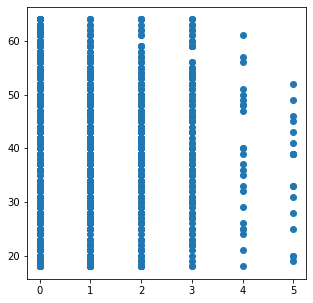

In [12]:
# Scatter plot of between Age and Children
fig, ax = plt.subplots(figsize=(5,5))
ax = plt.scatter(df.children,df.age)
plt.show()

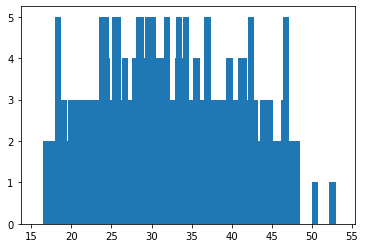

In [13]:
# Bar plot between bmi and children
fig, ax = plt.subplots()
ax = plt.bar(df.bmi, df.children)
plt.show()

In [14]:
# Perform encoding to convert character data into numerical data
from sklearn.preprocessing import OneHotEncoder

dummies = pd.get_dummies(df[['sex','smoker']])
dummies

,sex_female,sex_male,smoker_no,smoker_yes
0,1,0,0,1
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0
...,...,...,...,...
1333,0,1,1,0
1334,1,0,1,0
1335,1,0,1,0
1336,1,0,1,0


In [15]:
df = pd.concat([df,dummies],axis='columns')
df

,age,sex,bmi,children,smoker,region,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,1
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,1,0,1,0
1335,18,female,36.850,0,no,southeast,1629.83350,1,0,1,0
1336,21,female,25.800,0,no,southwest,2007.94500,1,0,1,0


In [16]:
df.drop(['sex','smoker','region'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   bmi         1338 non-null   float64
 2   children    1338 non-null   int64  
 3   charges     1338 non-null   float64
 4   sex_female  1338 non-null   uint8  
 5   sex_male    1338 non-null   uint8  
 6   smoker_no   1338 non-null   uint8  
 7   smoker_yes  1338 non-null   uint8  
dtypes: float64(2), int64(2), uint8(4)
memory usage: 47.2 KB


In [18]:
df

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,19,27.900,0,16884.92400,1,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0
2,28,33.000,3,4449.46200,0,1,1,0
3,33,22.705,0,21984.47061,0,1,1,0
4,32,28.880,0,3866.85520,0,1,1,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0
1334,18,31.920,0,2205.98080,1,0,1,0
1335,18,36.850,0,1629.83350,1,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0


## scaling data

In [19]:
from sklearn.preprocessing import StandardScaler
        
scaler = StandardScaler()
df[["age","bmi"]] = scaler.fit_transform(df[["age","bmi"]])
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes
0,-1.438764,-0.453320,0,16884.92400,1,0,0,1
1,-1.509965,0.509621,1,1725.55230,0,1,1,0
2,-0.797954,0.383307,3,4449.46200,0,1,1,0
3,-0.441948,-1.305531,0,21984.47061,0,1,1,0
4,-0.513149,-0.292556,0,3866.85520,0,1,1,0


### Create a train and test dataset

In [20]:
X = df.drop(['charges'], axis=1)
Y = df.charges

## Model Initialization

In [21]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(1070, 7) (268, 7) (1070,) (268,)


In [22]:
from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,Y_train)

print("Train Accuraccy: ", linearmodel.score(X_train,Y_train))
print("Test Accuraccy: ", linearmodel.score(X_test,Y_test))

Train Accuraccy:  0.7410888590280913
Test Accuraccy:  0.7811302113434095


In [23]:
y_preds = linearmodel.predict(X_test)
y_preds[:5]

array([ 8554.81711589,  6973.58746745, 36798.60416104,  9417.88282303,
       26871.68031081])

In [24]:
print(Y_test[:5],y_preds[:5])

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
Name: charges, dtype: float64 [ 8554.81711589  6973.58746745 36798.60416104  9417.88282303
 26871.68031081]


### Training and Testing Accuracy

In [25]:
print("Train Accuraccy: ", linearmodel.score(X_train,Y_train))
print("Test Accuraccy: ", linearmodel.score(X_test,Y_test))

Train Accuraccy:  0.7410888590280913
Test Accuraccy:  0.7811302113434095


### Slope, Intercept, MSE, MAE, RMSE, R2 score

In [26]:
from sklearn.metrics import accuracy_score, r2_score, mean_absolute_error, mean_squared_error
import math

mse = mean_squared_error(Y_test,y_preds)
mae = mean_absolute_error(Y_test,y_preds)
rmse = math.sqrt(mse)
r2 = r2_score(Y_test,y_preds)

print("slope:",linearmodel.coef_)
print("intercept: ",linearmodel.intercept_)
print("Mean Squared Error: ", mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R2 Score: ", r2)

slope: [ 3.61045878e+03  1.99661405e+03  4.27254431e+02  3.97589418e+00
 -3.97589418e+00 -1.18269517e+04  1.18269517e+04]
intercept:  19831.723959534756
Mean Squared Error:  33979257.05080823
Mean Absolute Error:  4213.484797807143
Root Mean Squared Error:  5829.172930254191
R2 Score:  0.7811302113434095


### Trying Ridge and lasso to improve Accuracy

In [27]:
from sklearn.linear_model import Ridge, Lasso

ridgemodel = Ridge()
ridgemodel.fit(X_train,Y_train)

print("-------Ridge Model-------")
print("Training Accuracy: ",ridgemodel.score(X_train,Y_train))
print("Testing Accuracy: ", ridgemodel.score(X_test,Y_test))
print("\n")

lassomodel = Lasso()
lassomodel.fit(X_train,Y_train)

print("-------Lasso Model-------")
print("Training Accuracy: ",lassomodel.score(X_train,Y_train))
print("Testing Accuracy: ", lassomodel.score(X_test,Y_test))

-------Ridge Model-------
Training Accuracy:  0.7410835068082103
Testing Accuracy:  0.7810062755824125


-------Lasso Model-------
Training Accuracy:  0.7410887656775768
Testing Accuracy:  0.7811100729522076


## Trying Random Forest Regressor

In [28]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

print("-------Random Forest Model-------")
print("Training Accuracy: ",rfr.score(X_train,Y_train))
print("Testing Accuracy: ", rfr.score(X_test,Y_test))

-------Random Forest Model-------
Training Accuracy:  0.9720104247617344
Testing Accuracy:  0.8590800582326923
